# SNLP Assignment 1

Name 1: <br/>
Student id 1: <br/>
Email 1: <br/>


Name 2: <br/>
Student id 2: <br/>
Email 2: <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for exercises 2, 3, and the bonus question (if you attempt it). There is no need to submit the data files. <br/>
Upload the zipped folder in Teams. Make sure to click on "Turn-in" after your upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---

## Exercise 1 (0 points)

Please carefully read the instructions on how to use Jupyter Notebooks and how to hand in the assignments.

## Exercise 2 (4 = 1+1+2 points)

The **Mandelbrot distribution** is a power-law distribution over ranked data.
\begin{equation}
f(r) \propto \frac{m}{(c+r)^B}
\end{equation}
Here $r$ is the rank of the data point and $c$ and $B$ are the parameters that define the distribution. $m$ is a normalizing constant ensuring that the distribution is a true probability distribution. 

**Zipf's** law or rather the Zipfian distribution is a special case of the Mandelbrot distribution. It holds that the relative frequency of a word in a corpus is inversely proportional to its rank in the frequency table. 

1. Which values for $m$, $c$ yield the Zipfian distribution? Explain how you arrived at these values. Show the result in the form of a $\LaTeX$ formula. What is a reasonable value for $B$? (1 Point)

2. Look again at Chapter 2, Slide 16. Why do the parameters of the distribution ($m$, $c$, $B$) differ in practice, i. e. for a real language, whether natural or artificial, from those obtained in 1.? (1 Point)

3. The so-called stick-breaking process is a notion of the [Dirichlet process](https://en.wikipedia.org/wiki/Dirichlet_process#The_stick-breaking_process). (the following [blog post](https://medium.com/@albertoarrigoni/dirichlet-processes-917f376b02d2) gives a nice introduction into the Dirichlet process, you should at least read the part concerned with stick-breaking).
The function `stick_breaking` in the code cell below draws a sample from a stick-breaking process with intensity $\alpha$. 
  * Choose a suitable value of $\alpha$ such that the distribution follows Zipf's law, and explain how $\alpha$ affects the distribution. 
  * Sample 100 values from the distribution, and plot them on log scale along with the 'ideal' Zipfian distribution obtained in 1. You will have to adjust the exponent $B$ such that it matches the distribution. The plotting code should be added to and imported from `exercise_2.py`. If you make changes to the code block below, please comment on why it was necessary.
  * Relate to your findings in 2.

**Answers**
1. For Zipfian distribution $m = 1$ and $c = 0$. We arrive at these values by looking at the Zipfian distribution where it says that $f \propto \frac{1}{r}$. Since the denominator $(c+r)^B$ must reduce to $r$, therefore, reasonable value of $B$ would be $1$.

2. The Zipfian distribution to said be incompetent in capturing the details. The parameter $B$  i.e. slope when it becomes $1$, the Zipf's law predicts that the resulting graph between rank and frequency would be a straight line. This is however, a bad fit for low and high rank words as the graph tends to bulge slightly near high and low ranks words. Hence in order to correctly capture these details, the parameters $(m, c, B)$ differ from those followed by Zpfian distribution.

3. 
(i) Higher the value of $\alpha$ more straight the line (in the distribution) becomes and matches to the "ideal" Zipfian distribution. <br>
(iii) With $B=1$ and $\alpha=1$, the resulting graph follows a straight line which is indeed the ideal Zipfian distribution.

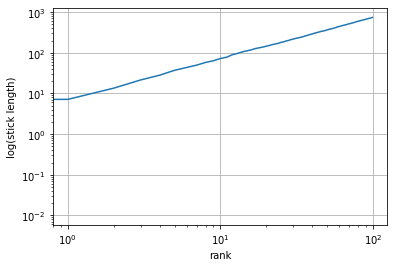

In [94]:
from importlib import reload
import exercise_2
exercise_2 = reload(exercise_2)

n = 100
alpha = 100 # TODO: choose alpha
B = 1 # TODO: choose B

stick_lengths = exercise_2.stick_breaking(n, alpha)
exercise_2.plot_stick_lengths(stick_lengths, alpha, B) #TODO: in exercise_2.py

## Exercise 3 (6 = 3+0.5+1+0.5+1 points)

The following cell executes the function `analysis` from the `exercise_3.py` file. You are given a tokenized input (list of words). 

1. Plot the frequencies against rank for the inputs (different languages) along with an 'ideal' curve according to the Zipf's law. Use the log-log scale. (3 points)

Then, answer the following questions and elaborate:

2. Does Zipf's law form an accurate prediction of your data? (0.5 point)
3. What are the differences between the languages? What causes them? (1 point)
4. In your plot, what causes the vertical gaps ("steps") for high-rank words  (rightmost)? (0.5 point)
5. Zipf's law "predicts" the frequency of the n-th rank word. Compute the mean squared error of these predictions $\big(\frac{1}{n} \sum (\hat{y} - y)^2\big)$, and output the value to 10 decimal digits. (1 point)

Please extend `exercise_3.py`. Ideally the following cell remains unchanged and outputs your code. If you make changes, please comment on why it was necessary.

**Answers** <br>

2. No the generated plots do not accurately follow Zipf's law since an exact linear relationship is not observed. Slight bulge can be observed for words with rank < 10. However the bulge becomes significant for the formal language: Python.

3. *\<Needs improvement>* <br>
The languages differ on the basis of morphology. English has more frequently words like "the", "is", "are" etc, however such words are not many and the curve experiences a slight flat region for a short time. For a formal language like Python, there are more sets of these common occuring tokens like ".", "(", "input" etc hence, this flatness persits longer.

4. The vertical gaps are caused by the least-occuring words whose freuencies range in the order 1-10. This is becuase $log(x)$ curve grows faster between for $x=0$ to $x=1$ ($log(1)=0$ and $log(10)=1$) and then grows slowly afterwards. Therefore when these freuqencies increases from 1 to 2 (if we look at the graph right to left), the resulting log plot reflects significantly faster growth resulting in steps. 

5. TODO

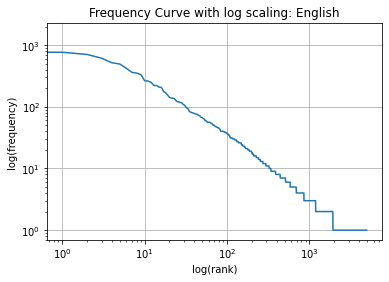

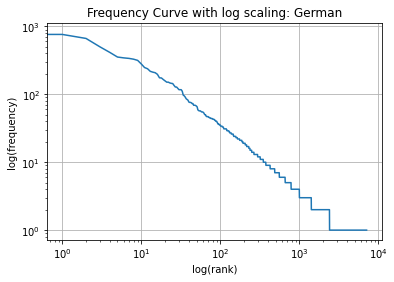

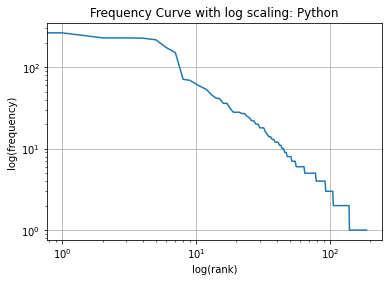

In [123]:
import tokenize
from importlib import reload
import exercise_3
exercise_3 = reload(exercise_3)

# run on English text
with open("data/alice_in_wonderland.txt", "r") as f:
    exercise_3.analysis("English", f.read().lower().split())

# run on German text
with open("data/alice_im_wunderland.txt", "r") as f:
    exercise_3.analysis("German", f.read().lower().split())

# run on PyTorch source
with open("data/torch_activation.py", "r") as f:
    tokens = [
        x.string
        for x in tokenize.generate_tokens(f.readline)
        if x.type not in {
            tokenize.COMMENT, tokenize.STRING, tokenize.INDENT, tokenize.DEDENT, tokenize.NEWLINE
        }
    ]
    exercise_3.analysis("Python", tokens)

# Bonus (1 point)

Repeat exercise 3 but on the character level (as opposed to word level). Your analysis can be much shorter but comment on the differences between the languages. You have to, however, write your own loader similar to the one we provided. For this, you may create a file `bonus.py` and import your code from there in a similar fashion to the above questions.